In [26]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [27]:
seed = 55

In [28]:
data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [29]:
# preprocess data
import re
import string

features = data.iloc[:, 2].values

for i in range(len(features)):
  features[i] = features[i].replace("@user", "")
  features[i] = features[i].translate(str.maketrans('', '', string.punctuation))
  features[i] = ''.join(i for i in features[i] if not i.isdigit())
  features[i] = re.sub(r'\s+', ' ', features[i], flags=re.I)
  features[i] = features[i].lower()
  features[i] = data.iloc[:, 2].values[i]

In [53]:
print(data.head(15))

    id  label                                              tweet
0    1      0   when a father is dysfunctional and is so self...
1    2      0   thanks for lyft credit i cant use cause they ...
2    3      0                                bihday your majesty
3    4      0  model i love u take with u all the time in urð...
4    5      0                  factsguide society now motivation
5    6      0   huge fan fare and big talking before they lea...
6    7      0                          camping tomorrow dannyâ¦
7    8      0  the next school year is the year for examsð¯...
8    9      0  we won love the land allin cavs champions clev...
9   10      0                         welcome here im its so gr 
10  11      0   â ireland consumer price index mom climbed ...
11  12      0  we are so selfish orlando standwithorlando pul...
12  13      0        i get to see my daddy today days gettingfed
13  14      1   cnn calls michigan middle school build the wa...
14  15      1  no comment

In [31]:
from sklearn.model_selection import train_test_split

features = data.iloc[:, 2].values
labels = data.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

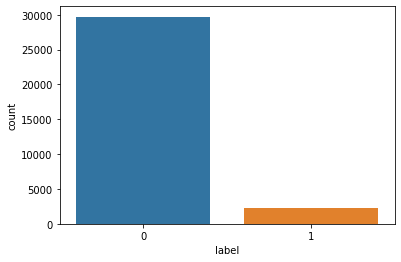

In [32]:
import seaborn as sns

sns.countplot(x='label', data=data)

In [33]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [34]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 280

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [35]:
print(X_train)
print(X_test)

[[  57  350    5 ...    0    0    0]
 [  11  813 1405 ...    0    0    0]
 [3582  693    2 ...    0    0    0]
 ...
 [ 205 2353 2238 ...    0    0    0]
 [ 176    8    1 ...    0    0    0]
 [3080  139   48 ...    0    0    0]]
[[   4   35   51 ...    0    0    0]
 [  46   35  530 ...    0    0    0]
 [ 953 4807    9 ...    0    0    0]
 ...
 [1897    1 4723 ...    0    0    0]
 [ 226  244  210 ...    0    0    0]
 [  19  862    6 ...    0    0    0]]


In [36]:
embedding_layer = Embedding(vocab_size, 100, input_length=maxlen)
model = Sequential()
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 280, 100)          3944200   
_________________________________________________________________
flatten_1 (Flatten)          (None, 28000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 28001     
Total params: 3,972,201
Trainable params: 3,972,201
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
160/160 [==============================] - 11s 64ms/step - loss: 0.2364 - acc: 0.9246 - val_loss: 0.1713 - val_acc: 0.9402
Epoch 2/10
160/160 [==============================] - 10s 61ms/step - loss: 0.1187 - acc: 0.9558 - val_loss: 0.1313 - val_acc: 0.9531
Epoch 3/10
160/160 [==============================] - 10s 61ms/step - loss: 0.0747 - acc: 0.9732 - val_loss: 0.1256 - val_acc: 0.9548
Epoch 4/10
160/160 [==============================] - 10s 61ms/step - loss: 0.0500 - acc: 0.9839 - val_loss: 0.1289 - val_acc: 0.9574
Epoch 5/10
160/160 [==============================] - 10s 61ms/step - loss: 0.0338 - acc: 0.9907 - val_loss: 0.1306 - val_acc: 0.9566
Epoch 6/10
160/160 [==============================] - 10s 65ms/step - loss: 0.0231 - acc: 0.9948 - val_loss: 0.1376 - val_acc: 0.9552
Epoch 7/10
160/160 [==============================] - 10s 61ms/step - loss: 0.0163 - acc: 0.9967 - val_loss: 0.1462 - val_acc: 0.9564
Epoch 8/10
160/160 [==============================] - 10s 61ms

In [39]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [43]:
print('Accuracy: %f' % (accuracy*100))

Accuracy: 96.026903


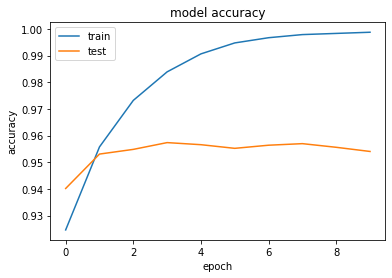

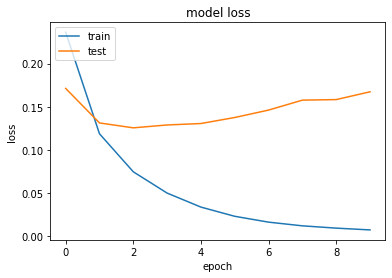

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [54]:
sentence = features[14]
print(sentence)

no comment in australia opkillingbay seashepherd helpcovedolphins thecove helpcovedolphins


In [55]:
instance = tokenizer.texts_to_sequences(sentence)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[1.3918753e-06]], dtype=float32)